<div style="background-color: #28a745 !important; color: white; min-height: 50px; padding: 10px; margin: auto;">
    <p style="text-align: right; font-style: italic">Praktikum Metode Komputasi-6</p>
    <h1>Pengenalan Interpolasi dalam Python</h1>
</div>
<div style="background-color: whitesmoke; padding: 10px ">
    <ul>
        <li>Tujuan: Memperkenalkan beberapa jenis interpolasi pada Python</li>
        <li>Keluaran: Mahasiswa dapat memahami metode-metode interpolasi dana menerapkannya dalam Python</li>
        <li>Pertemuan: 6</li>
        <li>Waktu/Tempat: Jumat, 25 April 2020/ Youtube</li>
    </ul>
</div>

## 1. Seperti apa interpolasi itu?

Interpolasi adalah suatu proses untuk menentukan nilai di suatu titik berdasarkan nilai titik-titik di sekitarnya. Proses ini dilakukan karena saat pengambilan data di lapangan biasnaya kita hanya mengambil sampling-sampling titik-titik tertentu. Nilai di wilayah-wilayah di sekitar tempat kita sampling data dapat ditetntukan dengan menggunakan interpolasi ini. Ada berbagai macam metode interpolasi, dalam praktikum ini kita akan menggunakan 3 macam metode interpolasi yang ada dalam paket `scipy` yaitu `linear`, `nearest`, dan `cubic`.

Saat kita melakukan akuisisi di lapangan biasanya saat mendesain titik-titik survei kita dihadapakan pada beberapa batasan yaitu biaya, waktu, dan resolusi. Survei biasanya dilakukan dengan waktu dan biaya yang terbatas, oleh karena itu agar efektif seharusnya kita menentukan jumlah dan spasi titik ukur yang paling optimal dengan resolusi yang cukup. Semakin sedikit titik survei dan semakin lebar jarak antara titik maka biaya dan waktu semakin rendah, tetapi resolusi data menjadi rendah juga. Oleh karena itu kita biasanya mencari jumlah optimal dimana jumlah titik dan spasinya optimal dengan resolusi yang kita harapkan.

### 1.1 Pengenalan `pandas` 

Kita akan melakukan interpolasi dari data lapangan asli yang biasanya digunakan untuk praktikum pemrosesan data non seismik. Data yang didapatkan biasanya berbentuk tabular/tabel seperti Excel dengan nilai umum berupa koordinat dan nilai pengukuran. Untuk praktik ini kita akan simpan data tabular tersebut menjadi format CSV (comma separated values) atau data-data yang terpisahkan oleh tanda koma.

Nah data tersebut kemudian akan kita load ke Python, ada banyak cara untuk melakukannya, salah satunya menggunakan `pandas`, paket ini sendiri biasanya digunakan untuk pengolahan data tabular.... Nah apabila teman-teman belum menginstalnya maka dapat diinstall terlebih dahulu.

Untuk meload data kita dapat menggunakan fungsi `load_csv`:

In [99]:
import pandas as pd

data_gravitasi = pd.read_csv('./material/data_gravitasi.csv', delimiter = ',')

In [98]:
help(pd)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data.
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic an

In [100]:
data_gravitasi

,Nama titik,x,y,gobs
0,MG 001,468382.920,9281849.895,978123.886
1,MG 002,466304.082,9283087.659,978127.388
2,MG 003,469464.082,9283339.411,978125.695
3,MG 004,470596.486,9283051.793,978123.132
4,MG 005,472685.611,9280573.340,978116.323
...,...,...,...,...
92,MG 093,477310.018,9289146.779,978126.725
93,MG 094,479978.790,9284259.277,978115.840
94,MG 095,482697.804,9287586.288,978124.347
95,MG 096,481910.182,9291611.169,978129.657


Nah tabel di atas atau `data_gravitasi` merupakan sebuah `DataFrame` atau data-data yang ada di dalam sebuuah frame tertentu, data-data disini maksudnya adalah data perkolom, masing-masing kolom tersebut sebenarnya merupakan Array 1D. Bagaimana cara memanggil salah satu kolomnya?

Kita dapat menggunakan `loc` ataupun `iloc` seperti contoh di bawah ini:

In [101]:
x_g = data_gravitasi.loc[:, 'x']
print('x_g shape is: ', x_g.shape)

print('\nx_g: \n', x_g)

x_g shape is:  (97,)

x_g: 
 0     468382.920
1     466304.082
2     469464.082
3     470596.486
4     472685.611
         ...    
92    477310.018
93    479978.790
94    482697.804
95    481910.182
96    484775.528
Name: x, Length: 97, dtype: float64


In [22]:
x_gi = data_gravitasi.iloc[:,1]
print(x_gi)

0     468382.920
1     466304.082
2     469464.082
3     470596.486
4     472685.611
         ...    
92    477310.018
93    479978.790
94    482697.804
95    481910.182
96    484775.528
Name: x, Length: 97, dtype: float64


Nah jadi DataFrame berfungsi sebagai wadah array-array 1D tersebut menjadi satu bagian yang saling berhubungan. Karena setiap kolom merupakan Array 1D kita bisa coba plot koordinat x dan koordinat y menggunakan `matplotlib.pyplot.scatter` seperti di bawah ini:

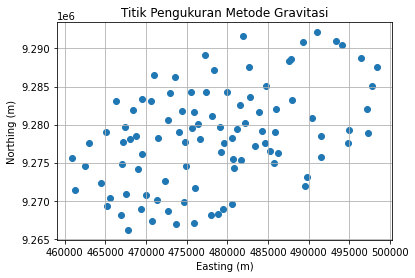

In [40]:
import matplotlib.pyplot as plt

x_g = data_gravitasi.loc[:, 'x']
y_g = data_gravitasi.loc[:, 'y']

plt.scatter(x_g, y_g, label="titik pengukuran")
plt.title('Titik Pengukuran Metode Gravitasi')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.grid(True)

plt.show()

Sebenarnya masih banyak sekali kegunaan dari `pandas` biasanya berkaitan dengan data tabular.

### 1.2 Interpolasi dalam `scipy`

Untuk interpolasi dalam Python ada berbagai macam cara, yang akan kita gunakan pada praktikum ini adalah berdasarkan modul `scipy` atau scientific python. Salah satu fungsi dalam modul ini adalah untuk interpolasi, fungsi tersebut adalah `scipy.interpolate.griddata`.

Untuk interpolasi menggunakan `griddata` kita perlu membuat koordinat teratur atau grid seperti pada praktikum kemarin. Nah nilai di setiap titik di dalam grid tersebut akan dicari menggunakan interpolasi dari titik-titik pengukuran yang sudah ada. Proses tersebut tidak secara manual kita lakukan menggunakan `meshgrid` seperti kemarin, tetapi secara otomatis dilakukan di dalam `griddata`. Namun kita akan coba visualisasikan dengan membuat penggambaran secara manual.

Mula-mula kita akan membuat koordinat x dan y sebagai modal untuk membuat grid. Koordinat x dan y ini kita dapatkan dengan `np.linspace` dari nilai x maupun y minimum (`np.min(x_g)` atau `np.min(y_g)`) sampai ke maksimumnya dengan jumlah titik sesuai keinginan kita, pada kasus ini kita ambil jumlah titik 200 sehingga spasi grid antar titik menjadi lebar sebaran data (xmax-xmin) dan (ymax-ymin) dibagi 200.

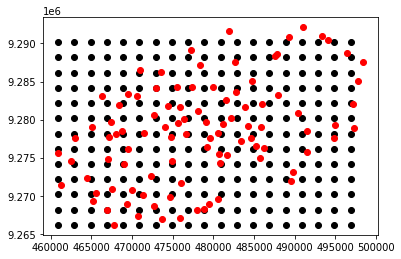

In [76]:
import numpy as np

xmin = np.min(x_g)
xmax = np.max(x_g)

ymin = np.min(y_g)
ymax = np.max(y_g)

x_g_grid = np.arange(xmin, xmax, 2000)
y_g_grid = np.arange(ymin, ymax, 2000)

X_g_grid, Y_g_grid = np.meshgrid(x_g_grid, y_g_grid)

plt.scatter(X_g_grid, Y_g_grid, color="black")
plt.scatter(x_g, y_g, color='red')

plt.show()

Gambar di atas hanyalah gambaran bahwa kita akan memperkirakan nilai-nilai di titik-titik hitam berdasarkan data pengukuran kita di titik-titik merah. Kegiatan memperkirakan inilah yang kita sebut sebagai interpolasi. Nah cara interpolasi sendiri sebagai berikut:

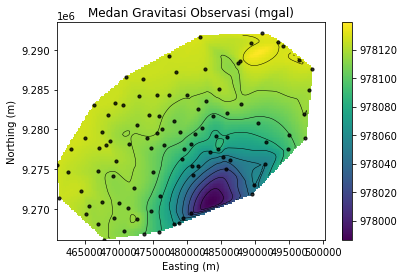

<Figure size 432x288 with 0 Axes>

In [121]:
import numpy as np
from scipy.interpolate import griddata

# data koordinat dan nilai pengukuran
x_g = data_gravitasi.loc[:, 'x']
y_g = data_gravitasi.loc[:, 'y']
gobs_g = data_gravitasi.loc[:, 'gobs']

xmin = np.min(x_g)
xmax = np.max(x_g)

ymin = np.min(y_g)
ymax = np.max(y_g)

x_g_grid = np.arange(xmin, xmax, 200)
y_g_grid = np.arange(ymin, ymax, 200)

#gobs_g_grid = griddata((x_g, y_g), gobs_g, (x_g_grid[None,:], y_g_grid[:, None]), method='cubic')
gobs_g_grid = griddata((x_g, y_g), gobs_g, (x_g_grid[None,:], y_g_grid[:, None]), method='cubic')


plt.pcolormesh(x_g_grid, y_g_grid, gobs_g_grid)
plt.colorbar()
plt.contour(x_g_grid, y_g_grid, gobs_g_grid, levels=14, linewidths=0.5, colors='k')
plt.scatter(x_g, y_g, s=10, alpha=0.8, color="black")

plt.title('Medan Gravitasi Observasi (mgal)')

plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')

plt.show()
plt.tight_layout()


In [107]:
x_g[None,:]

#x_g[:, None]

array([[468382.92 , 466304.082, 469464.082, 470596.486, 472685.611,
        474073.812, 475630.214, 474391.455, 472936.332, 471042.91 ,
        473607.583, 475553.895, 475888.785, 478157.236, 476364.206,
        471515.943, 468726.214, 467469.479, 467115.368, 469538.344,
        461283.633, 465214.243, 467824.719, 470708.856, 473741.028,
        475932.387, 478033.248, 478882.986, 479463.054, 480564.415,
        472682.814, 474653.577, 476014.556, 474973.466, 472295.654,
        469075.476, 476649.273, 479264.071, 480670.474, 480845.818,
        479565.575, 479051.6  , 480582.588, 481682.811, 481572.256,
        482196.527, 483457.378, 484608.307, 481141.706, 474771.127,
        482840.233, 483859.731, 484255.384, 485294.466, 485755.43 ,
        486261.588, 485864.977, 485935.087, 488000.051, 490373.194,
        491569.835, 494798.793, 491483.911, 489544.002, 489840.359,
        487536.984, 487836.984, 489378.399, 491033.507, 493439.796,
        494162.09 , 496400.287, 498365.524, 4978

<div style="background-color: #ffc107  !important; color: grey; min-height: 50px; padding: 10px; margin: auto;">
    <p style="text-align: right; font-style: italic">Praktikum Metode Komputasi-6</p>
    <h1>Tugas 6: Pengenalan Interpolasi dalam Python</h1>
</div>
<div style="background-color: whitesmoke; padding: 10px; padding-bottom: 0px; ">
    <ul>
        <li>Praktikum Metode Komputasi</li>
        <li>Pertemuan: 6</li>
        <li>Format file: Portable Document Format (PDF)</li>
        <li>Template:<a href="./material/report_template.docx"> Download Template Laporan</a></li>
        <li>Link Pengumpulan: Google Classroom</li>
        <li>Format Nama File: 6-[NIM]-Nama, contoh: 6-362705-Anang Sahroni</li>
        <li>Data Magnetik: <a href="./material/data_magnetik_praktikum.csv">Download Data</a></li>
    </ul>
</div>
<div style="background-color: #dc3545; color: white ">
    <ul>
        <li>Deadline: Rabu, 29 April 2020 17.00 WIB, dijadikan 1 dengan semua laporan terdahulu</li>
    </ul>
</div>

<p> Teman-teman buatlah peta seperti di bawah ini menggunakan data sampel yang dapat diunduh pada link di atas, laporan paling lambat hari Rabu, 29 April 2020 dijadikan 1 file dengan semua laporan terdahulu. Karena waktu terbatas untuk laporan ini cukup tuliskan kode keseluruhan, hasil gambar, dan pembahasan secara singkat(tidak perlu rinci perbagian). </p>

![H observasi](./material/hobs.png)